In [57]:
import pandas as pd
from statistics import median
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = [
    'Powierzchnia',                                        # 1
    'Wynagrodzenie_ogolem',                                # 2
    'Wynagrodzenie_w_relacji_do_sredniej',                 # 3
    'Dochody_podatek_lesny',                               # 4
    'Dochody_podatek_PCC',                                 # 5
    'Dochody_podatek_od_dzialalnosci_gospodarczej',        # 6
    'Dochody_podatek_od_nieruchomosci',                    # 7
    'Dochody_podatek_od_spadkow',                          # 8
    'Dochody_podatek_od_srodkow_transportowych',           # 9
    'Dochody_podatek_rolny',                               # 10
    'Dochody_podatek_odrebne_ustawy',                      # 11
    'Dochody_razem',                                       # 12
    'Dochody_z_majatku',                                   # 13
    'Dochody_z_najmu_i_dzierzawy',                         # 14
    'Dochody_z_uslug',                                     # 15
    'Dochody_dofinansowanie_inwestycyjne',                 # 16
    'Dochody_dofinansowanie_razem',                        # 17
    'Udzialy_w_podatkach_dochodowych_od_osob_fizycznych',  # 18
    'Udzialy_w_podatkach_dochodowych_od_osob_prywatnych',  # 19
    'Udzialy_w_podatkach_dochodowych_razem',               # 20
    'Wplywy_z_innych_lokalnych_oplat',                     # 21
    'Wplywy_z_oplaty_eksploatacyjnej',                     # 22
    'Wplywy_z_oplaty_skarbowej',                           # 23
    'Wplywy_z_oplaty_targowej',                            # 24
    'Ludnosc_ogolem',                                      # 25
    'Ludnosc_w_wieku_poprodukcyjnym',                      # 26
    'Ludnosc_w_wieku_produkcyjnym',                        # 27
    'Ludnosc_w_wieku_produkcyjnym_mobilnym',               # 28
    'Ludnosc_w_wieku_produkcyjnym_niemobilnym',            # 29
    'Ludnosc_w_wieku_przedprodukcyjnym',                   # 30
    'Ludnosc_mezczyzni',                                   # 31
    'Ludnosc_mezczyzni_w_wieku_poprodukcyjnym',            # 32
    'Ludnosc_mezczyzni_w_wieku_produkcyjnym',              # 33
    'Ludnosc_mezczyzni_w_wieku_produkcyjnym_mobilnym',     # 34
    'Ludnosc_mezczyzni_w_wieku_produkcyjnym_niemobilnym',  # 35
    'Ludnosc_mezczyzni_w_wieku_przedprodukcyjnym',         # 36
    'Ludnosc_kobiety',                                     # 37
    'Ludnosc_kobiety_w_wieku_poprodukcyjnym',              # 38
    'Ludnosc_kobiety_w_wieku_produkcyjnym',                # 39
    'Ludnosc_kobiety_w_wieku_produkcyjnym_mobilnym',       # 40
    'Ludnosc_kobiety_w_wieku_produkcyjnym_niemobilnym',    # 41
    'Ludnosc_kobiety_w_wieku_przedprodukcyjnym',           # 42
    'Wojewodztwo_Dolnoslaskie',                            # 43
    'Wojewodztwo_Kujawsko_Pomorskie',                      # 44
    'Wojewodztwo_Lubelskie',                               # 45
    'Wojewodztwo_Lubuskie',                                # 46
    'Wojewodztwo_Lodzkie',                                 # 47
    'Wojewodztwo_Malopolskie',                             # 48
    'Wojewodztwo_Mazowieckie',                             # 49
    'Wojewodztwo_Opolskie',                                # 50
    'Wojewodztwo_Podkarpackie',                            # 51
    'Wojewodztwo_Podlaskie',                               # 52
    'Wojewodztwo_Pomorskie',                               # 53
    'Wojewodztwo_Slaskie',                                 # 54
    'Wojewodztwo_Swietokrzyskie',                          # 55
    'Wojewodztwo_Warminsko_Mazurskie',                     # 56
    'Wojewodztwo_Wielkopolskie',                           # 57
    'Wojewodztwo_Zachodniopomorskie',                      # 58
    'Gestosc_zaludnienia',                                 # 59
    'Ludnosc_na_1_km2',                                    # 60
    'Ludnosc',                                             # 61
    'Wskaznik_urbanizacji',                                # 62
    'Zmiana_liczby_ludnosci',                              # 63
    'Saldo_migracji_na_1000_ludnosci',                     # 64
    'Saldo_migracji',                                      # 65
    'Wymeldowania_do_miast_kobiety',                       # 66
    'Wymeldowania_do_miast_mezczyzni',                     # 67
    'Wymeldowania_do_miast_ogolem',                        # 68
    'Wymeldowania_na_wies_kobiety',                        # 69
    'Wymeldowania_na_wies_mezczyzni',                      # 70
    'Wymeldowania_na_wies_ogolem',                         # 71
    'Wymeldowania_kobiety',                                # 72
    'Wymeldowania_mezczyzni',                              # 73
    'Wymeldowania_ogolem',                                 # 74
    'Zameldowania_kobiety',                                # 75
    'Zameldowania_mezczyzni',                              # 76
    'Zameldowania_ogolem',                                 # 77
    'Zameldowania_z_miast_kobiety',                        # 78
    'Zameldowania_z_miast_mezczyzni',                      # 79
    'Zameldowania_z_miast_ogolem',                         # 80
    'Zameldowania_ze_wsi_kobiety',                         # 81
    'Zameldowania_ze_wsi_mezczyzni',                       # 82
    'Zameldowania_ze_wsi_ogolem',                          # 83
    'Miejsca_noclegowe_caloroczne',                        # 84
    'Miejsca_noclegowe_ogolem',                            # 85
    'Obiekty_caloroczne',                                  # 86
    'Obiekty_ogolem',                                      # 87
    'Turysci_ogolem',                                      # 88
    'Turysci_zagraniczni',                                 # 89
    'Bezrobotni_do_25_roku_zycia',                         # 90
    'Dlugotrwale_bezrobotni',                              # 91
    'Bezrobotne_kobiety',                                  # 92
    'Bezrobotni_mezczyzni',                                # 93
    'Bezrobotni_ogolem',                                   # 94
    'Bezrobotni_powyzej_50_roku_zycia',                    # 95
    'Gmina_miejska',                                       # 96
    'Gmina_miejsko_wiejska',                               # 97
    'Gmina_wiejska',                                       # 98
    'Odleglosc_Warszawa',                                  # 99
    'Odleglosc_od_centrum_decyzyjnego']                    # 100

all_columns = ['Kod', 'Rok'] + feature_names

df_data = pd.read_csv(
    'dane1.csv',
    encoding='ISO-8859-2',
    converters={'Kod': str})

df_odl = pd.read_csv(
    'gminy_centroid.csv',
    encoding='ISO-8859-2',
    converters={'TERYT': str})
df_odl['TERYT'] = df_odl['TERYT'].astype('str')
df_odl = df_odl[['TERYT', 'odl_Wawa', 'odl_woj']]
df_odl = df_odl.rename(columns={
    'TERYT': 'Kod',
    'odl_Wawa': 'Odleglosc_Warszawa',
    'odl_woj': 'Odleglosc_od_centrum_decyzyjnego'})

df_data = df_data.merge(df_odl, on=['Kod'], how='left')

print(df_data['Program_operacyjny'].drop_duplicates().values)

['Program Operacyjny Infrastruktura i ?rodowisko 2014-2020'
 'Program Operacyjny Inteligentny RozwĂłj'
 'Program Operacyjny Polska Cyfrowa'
 'Program Operacyjny Wiedza Edukacja RozwĂłj'
 'Program Operacyjny Polska Wschodnia']


In [58]:
# Wybór programu operacyjnego...
df_data = df_data.loc[df_data['Program_operacyjny'] == 'Program Operacyjny Polska Cyfrowa'].reset_index(drop=True)

# Uzupełnienie brakujących danych...
df_data[[
    'Miejsca_noclegowe_caloroczne',
    'Miejsca_noclegowe_ogolem',
    'Obiekty_caloroczne',
    'Obiekty_ogolem',
    'Turysci_ogolem',
    'Turysci_zagraniczni']] = df_data[[
        'Miejsca_noclegowe_caloroczne',
        'Miejsca_noclegowe_ogolem',
        'Obiekty_caloroczne',
        'Obiekty_ogolem',
        'Turysci_ogolem',
        'Turysci_zagraniczni']].fillna(0)

# Usunięcie niepotrzebnych rzędów...
df_data.dropna(inplace=True)
df_data = df_data[df_data['Suma'] > 0]

df_data = df_data.groupby(all_columns)['Suma'].sum().reset_index()

# ...
# df_data['Suma'] = df_data['Suma'] / df_data['Ludnosc']

print('Median', median(df_data['Suma']))
print('Mean', sum(df_data['Suma'])/len(df_data['Suma']))

X = df_data[feature_names]
y = df_data['Suma']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Median 549828.735
Mean 893364.8266077801


C:\Users\micha\AppData\Local\Temp\ipykernel_14224\845662055.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_data = df_data.groupby(all_columns)['Suma'].sum().reset_index()
C:\Users\micha\AppData\Local\Temp\ipykernel_14224\845662055.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_data = df_data.groupby(all_columns)['Suma'].sum().reset_index()
C:\Users\micha\AppData\Local\Temp\ipykernel_14224\845662055.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

In [39]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
    'n_features_to_select': [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2]
}

best_mse = np.inf
best_model = None
best_params = None

results_train = []
results_test = []

for params in [{'max_depth': max_depth, 'n_features_to_select': n_features} 
               for max_depth in param_grid['max_depth'] 
               for n_features in param_grid['n_features_to_select']]:

    selector = RFE(estimator=DecisionTreeRegressor(random_state=0, max_depth=params['max_depth']), n_features_to_select=params['n_features_to_select'])
    selector.fit(X_train, y_train)
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)
    
    model = DecisionTreeRegressor(random_state=0, max_depth=params['max_depth'])
    model.fit(X_train_selected, y_train)
    
    y_pred_train = model.predict(X_train_selected)
    y_pred_test = model.predict(X_test_selected)

    mse_train = mean_squared_error(y_pred_train, y_train)
    mse_test = mean_squared_error(y_pred_test, y_test)

    results_train.append((params['max_depth'], params['n_features_to_select'], mse_train))
    results_test.append((params['max_depth'], params['n_features_to_select'], mse_test))

    if mse_test < best_mse:
        best_mse = mse_test
        best_model = (model, selector)
        best_params = (params['max_depth'], params['n_features_to_select'])

        print(f"max_depth: {params['max_depth']:>{2}}, "
              f"n_features: {params['n_features_to_select']:>{2}}, "
              f"mse_train: {mse_train:>{20}.1f}, "
              f"mse_test: {mse_test:>{20}.1f} <-")
    else:
        print(f"max_depth: {params['max_depth']:>{2}}, "
              f"n_features: {params['n_features_to_select']:>{2}}, "
              f"mse_train: {mse_train:>{20}.1f}, "
              f"mse_test: {mse_test:>{20}.1f}")

max_depth:  3, n_features: 20, mse_train:       985605388909.4, mse_test:      1473640288814.4 <-
max_depth:  3, n_features: 19, mse_train:       985605388909.4, mse_test:      1473640288814.4 <-
max_depth:  3, n_features: 18, mse_train:       985605388909.4, mse_test:      1473640288814.4 <-
max_depth:  3, n_features: 17, mse_train:       985605388909.4, mse_test:      1473640288814.4
max_depth:  3, n_features: 16, mse_train:       985605388909.4, mse_test:      1473640288814.4
max_depth:  3, n_features: 15, mse_train:       985605388909.4, mse_test:      1473640288814.4
max_depth:  3, n_features: 14, mse_train:       985605388909.4, mse_test:      1473640288814.4
max_depth:  3, n_features: 13, mse_train:       985605388909.4, mse_test:      1473640288814.4
max_depth:  3, n_features: 12, mse_train:       985605388909.4, mse_test:      1473640288814.4
max_depth:  3, n_features: 11, mse_train:       985605388909.4, mse_test:      1473640288814.4
max_depth:  3, n_features: 10, mse_train:

In [40]:
print(best_params)

(20, 13)


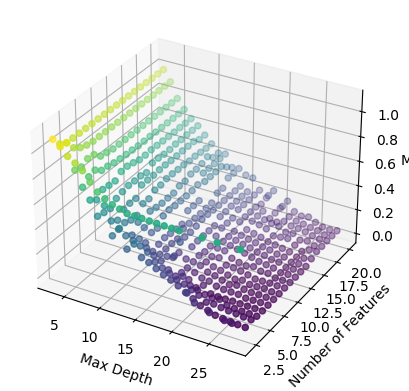

In [59]:
results_train_df = pd.DataFrame(results_train, columns=['max_depth', 'n_features_to_select', 'mse_train'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = results_train_df['max_depth']
ys = results_train_df['n_features_to_select']
zs = results_train_df['mse_train']

ax.scatter(xs, ys, zs, c=zs, marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Features')
ax.set_zlabel('MSE')

plt.show()

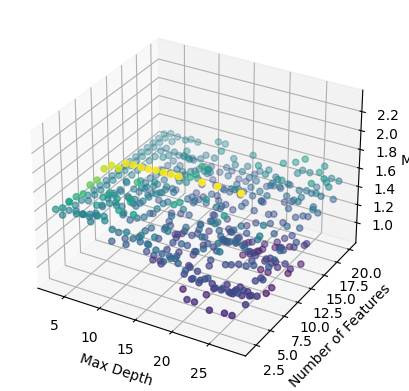

In [60]:
results_test_df = pd.DataFrame(results_test, columns=['max_depth', 'n_features_to_select', 'mse_test'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = results_test_df['max_depth']
ys = results_test_df['n_features_to_select']
zs = results_test_df['mse_test']

ax.scatter(xs, ys, zs, c=zs, marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Features')
ax.set_zlabel('MSE')

plt.show()

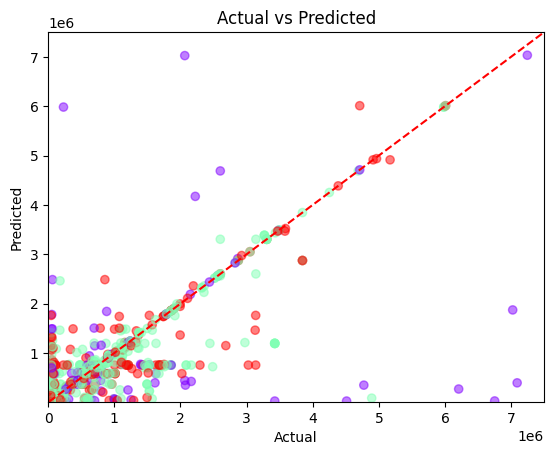

In [63]:
X_test_selected = best_model[1].transform(X_test)
y_pred_test = best_model[0].predict(X_test_selected)

color_column = df_data['Gmina_miejska'] * 0 + df_data['Gmina_miejsko_wiejska'] * 10 + df_data['Gmina_wiejska'] * 5

color_column_train, color_column_test = train_test_split(color_column, test_size=0.2, random_state=0)

min_val = min(min(y_test), min(y_pred_test))
max_val = max(max(y_test), max(y_pred_test))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.scatter(y_test, y_pred_test, alpha=0.5, c=color_column_test, cmap='rainbow')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.xlim(0, 0.75*10**7)
plt.ylim(min(y_pred_test), 0.75*10**7)

plt.show()

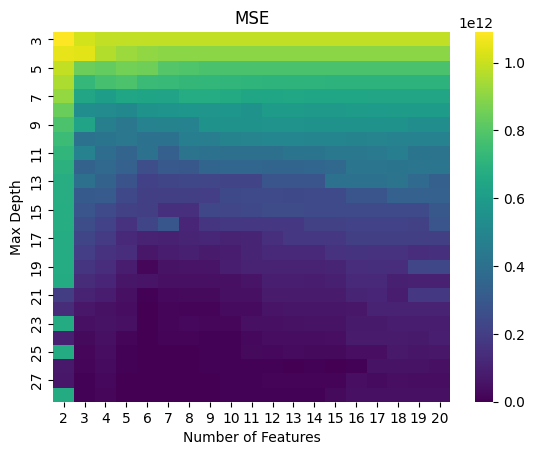

In [64]:
results_train_df = pd.DataFrame(results_train, columns=['max_depth', 'n_features_to_select', 'mse_train'])

heatmap_data = results_train_df.pivot(index='max_depth', columns='n_features_to_select', values='mse_train')

sns.heatmap(heatmap_data, annot=False, fmt=".2f", cmap="viridis")

plt.title('MSE')
plt.xlabel('Number of Features')
plt.ylabel('Max Depth')
plt.show()

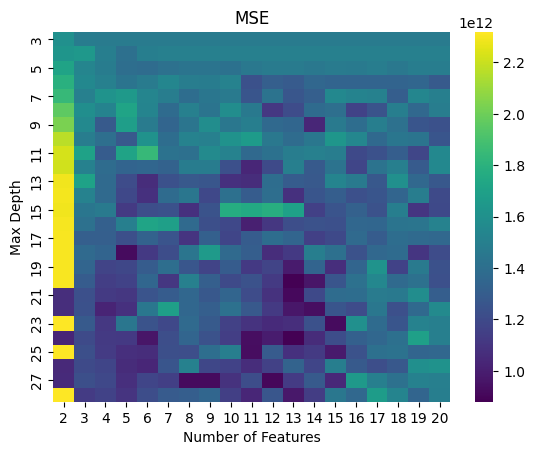

In [51]:
results_test_df = pd.DataFrame(results_test, columns=['max_depth', 'n_features_to_select', 'mse_test'])

heatmap_data = results_test_df.pivot(index='max_depth', columns='n_features_to_select', values='mse_test')

sns.heatmap(heatmap_data, annot=False, fmt=".2f", cmap="viridis")

plt.title('MSE')
plt.xlabel('Number of Features')
plt.ylabel('Max Depth')
plt.show()

In [45]:
feature_importance = dict(zip(feature_names, best_model[0].feature_importances_))
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f'{importance:.4f} \u2014 {feature}')

0.3853 — Dochody_podatek_od_nieruchomosci
0.2161 — Dochody_podatek_od_srodkow_transportowych
0.0911 — Powierzchnia
0.0670 — Wynagrodzenie_ogolem
0.0581 — Dochody_podatek_PCC
0.0424 — Dochody_razem
0.0292 — Dochody_z_majatku
0.0286 — Dochody_podatek_od_spadkow
0.0277 — Dochody_podatek_rolny
0.0225 — Dochody_podatek_od_dzialalnosci_gospodarczej
0.0156 — Wynagrodzenie_w_relacji_do_sredniej
0.0107 — Dochody_podatek_odrebne_ustawy
0.0057 — Dochody_podatek_lesny


In [46]:
X_test['Przewidziana Suma'] = y_pred_test
X_test['Suma'] = y_test
display(X_test[np.abs(y_test - y_pred_test) < 1])
display(X_test['Suma'][np.abs(y_test - y_pred_test) < 1].drop_duplicates().values)

C:\Users\micha\AppData\Local\Temp\ipykernel_14224\3704736663.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['Przewidziana Suma'] = y_pred_test
C:\Users\micha\AppData\Local\Temp\ipykernel_14224\3704736663.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['Suma'] = y_test


,Powierzchnia,Wynagrodzenie_ogolem,Wynagrodzenie_w_relacji_do_sredniej,Dochody_podatek_lesny,Dochody_podatek_PCC,Dochody_podatek_od_dzialalnosci_gospodarczej,Dochody_podatek_od_nieruchomosci,Dochody_podatek_od_spadkow,Dochody_podatek_od_srodkow_transportowych,Dochody_podatek_rolny,...,Bezrobotni_mezczyzni,Bezrobotni_ogolem,Bezrobotni_powyzej_50_roku_zycia,Gmina_miejska,Gmina_miejsko_wiejska,Gmina_wiejska,Odleglosc_Warszawa,Odleglosc_od_centrum_decyzyjnego,Przewidziana Suma,Suma
1319,100.0,3779.10,72.9,93981.92,365408.23,5990.13,3065899.23,44610.00,189528.36,910440.39,...,142.0,367.0,81.5,0,1,0,261.0,77.0,1860350.76,1860350.76
2619,102.0,3463.10,71.6,99953.98,104129.00,12044.14,2395129.05,14909.00,307592.55,79375.79,...,57.0,130.0,32.5,0,0,1,198.0,91.0,1498567.97,1498567.97
898,125.0,4786.11,86.7,3707.00,187923.00,2366.98,1150221.59,55974.84,197984.69,981887.41,...,71.0,135.0,33.5,0,0,1,100.0,46.0,486083.96,486083.96
615,172.0,3764.14,77.9,256320.29,81812.00,0.00,1006100.88,34139.00,35029.00,241699.70,...,30.0,98.5,25.0,0,0,1,162.0,48.0,3493097.22,3493097.22
1317,86.0,3779.10,72.9,50013.00,361760.03,12538.98,5595064.42,35481.32,286227.23,689321.45,...,93.5,287.0,73.5,0,0,1,249.0,79.0,1860350.76,1860350.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,110.0,4195.22,76.0,14385.61,196259.08,3860.54,1036514.37,20938.34,148191.22,858593.83,...,38.5,87.5,23.5,0,0,1,197.0,126.0,183762.63,183762.63
2771,131.0,4515.28,99.7,188729.01,245472.61,14341.25,3335288.19,57052.58,267934.40,48568.21,...,135.0,326.5,75.0,0,0,1,338.0,83.0,913353.54,913353.54
1269,32.0,3400.75,75.1,37752.65,125139.00,0.00,990652.07,9266.00,202607.60,86466.96,...,67.5,139.0,32.5,0,0,1,309.0,55.0,108165.60,108165.60
1246,126.0,3681.50,76.1,238373.86,319604.16,1755.85,3169234.07,55944.22,233611.73,41946.11,...,119.0,350.5,91.5,0,1,0,312.0,86.0,26439.77,26439.77


array([1860350.76, 1498567.97,  486083.96, 3493097.22,  571715.87,
       1028236.29, 4252230.31, 3304757.1 ,   89784.  ,  905697.19,
       1035082.51,   43758.91, 1754503.74, 1181942.75,   29737.5 ,
        113582.96,  115037.1 ,  122196.66, 3052544.65,   29928.  ,
        590971.38,   36054.23, 2602729.18,  701604.12,  144384.92,
       4688787.43, 3483121.16,  501415.56,   62322.53, 4711234.74,
        100580.97,  571292.08,  884181.41, 2322080.77,   36297.77,
       3435512.15,  350776.06, 1790128.78, 2563499.46,  276609.  ,
       1187850.12,   54795.97, 2516963.67,   26439.77, 1780651.04,
       1900488.13,  596683.9 ,   45304.07,   39659.65,   77247.93,
        456071.25,  688016.43,  614119.12,   53798.55,   31818.33,
        518641.88,   77554.07,  370119.47, 1995853.47,  766096.1 ,
        672921.52,   14382.12,   40444.31,   36465.76, 2874827.68,
         75721.97,  665436.59, 1572715.87, 2360742.42,  317790.93,
        252263.98,   53527.5 ,  354722.08,  634649.02, 1741560